Evidential Deep Learning to Quantify Classification Uncertainty
- aimed at detecting out-of-distribution queries and adversarial samples
- penalizes incorrect evidence on errors and out-of-distribution examples through loss function
    - evidence is a measure of the amount of support
collected from data in favor of a sample to be classified into a certain class
    - tries to shrink the total evidence (relu activation) to zero if the sample cannot be correctly classified 
    - uses Kullback–Leibler divergence (KL) loss to force the model to be uncertain especially when its prediction is incorrect through mean squared error, log likelihood, or digamma
- recognizes when the model is likely to fail

There are two axes of NN uncertainty that can be modeled: 
- (1) uncertainty in the data, called aleatoric uncertainty, and 
- (2) uncertainty in the prediction, called epistemic uncertainty.

This is a computationally efficient alternative to model ensembles, Bayesion NNs, and monte carlo dropout, which also gets at model uncertainty

In [1]:
import sys
sys.path.append('/home/vanessa/hulk/cocpit')
sys.path.append('/home/vanessa/hulk/ai2es')

import pandas as pd
from typing import List, Tuple
import os
from cocpit import config as config
from ai2es import evidential_utils as evidential

%load_ext autoreload
%autoreload 2

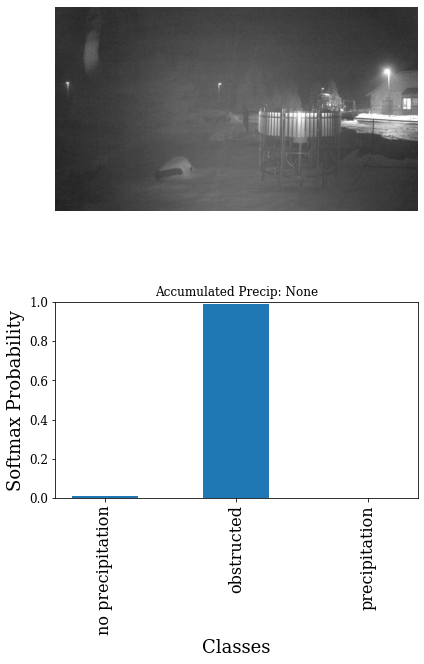

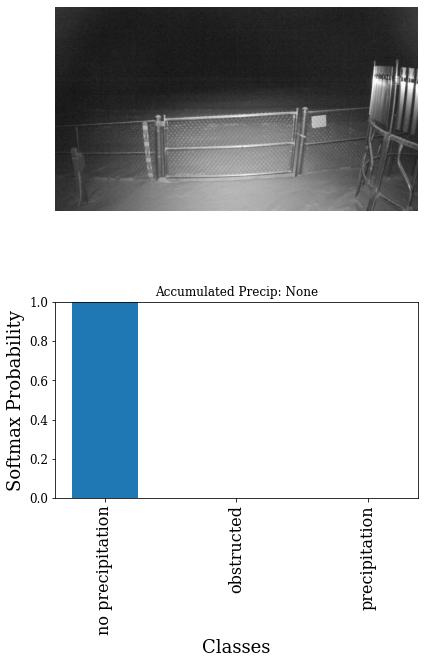

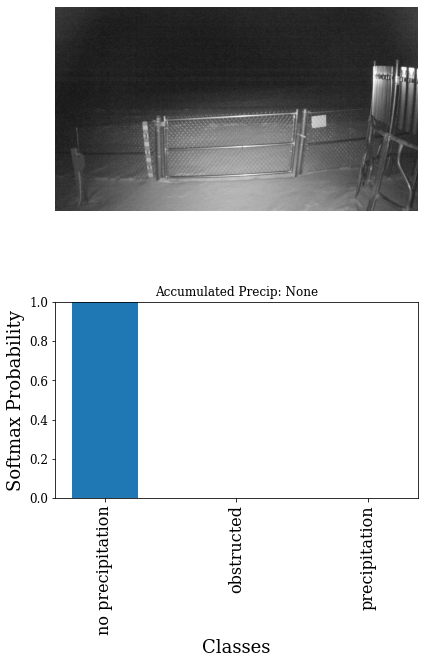

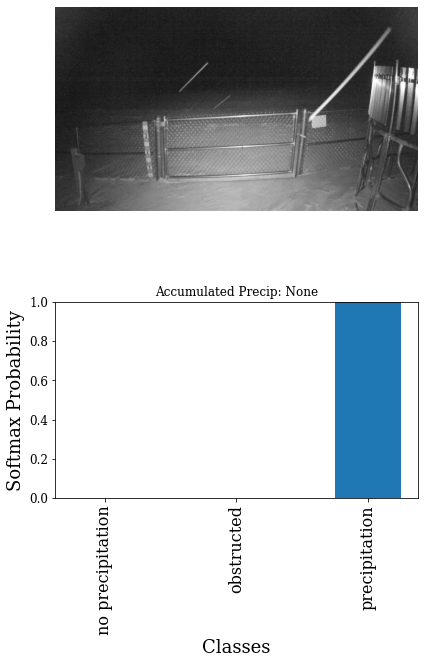

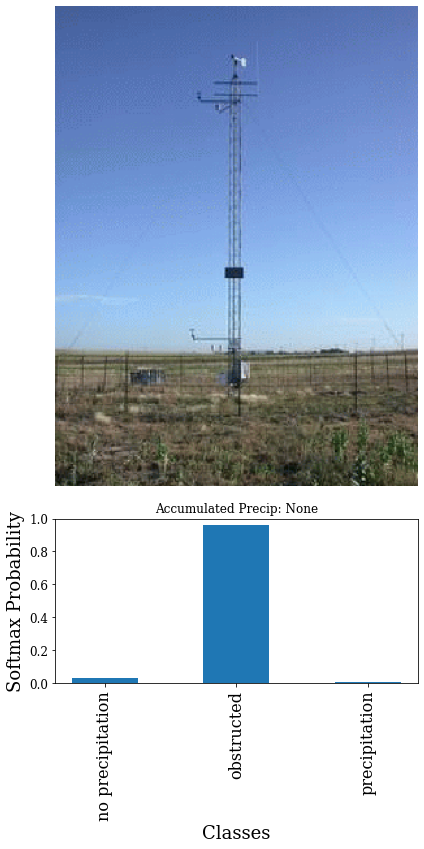

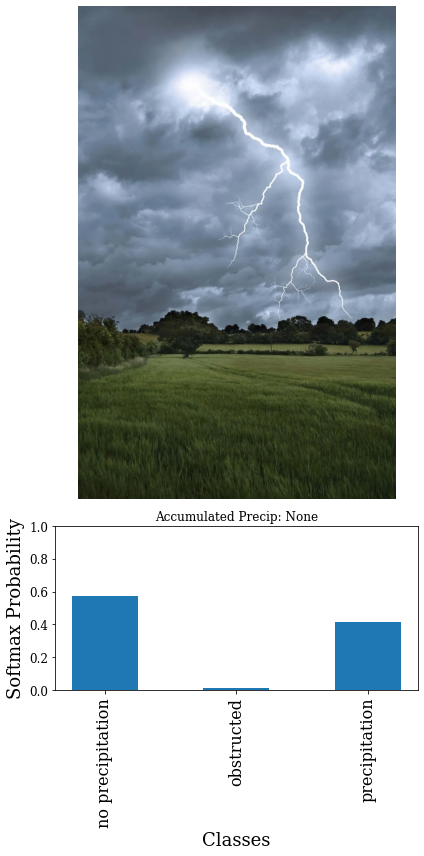

In [3]:
"""test uncertainty calculation on some hand chosen examples in and out of distribution norms"""
# sourcery skip: avoid-global-variables
import torch
model = torch.load(
    '/home/vanessa/hulk/ai2es/saved_models/v0.0.0/e[30]_bs[64]_k0_1model(s).pt')
img_paths = [f'{config.BASE_DIR}/codebook_dataset/combined_extra/obstructed/20170103T223007_NHUD.jpg',
             f'{config.BASE_DIR}/codebook_dataset/combined_extra/no_precip/20170101T080002_ANDE.jpg',
             f'{config.BASE_DIR}/codebook_dataset/combined_extra/no_precip/20170101T112501_ANDE.jpg',
             f'{config.BASE_DIR}/codebook_dataset/combined_extra/precip/20170101T030002_ANDE.jpg',
             f'{config.BASE_DIR}/notebooks/Oklahoma-Mesonet.png',
             f'{config.BASE_DIR}/notebooks/thunderstorm-and-lightning.png'
             ]
evidential.uncertainty_examples(model, img_paths)


In [4]:
"""get base filenames from Mesonet obs, not including the path to match with validation dataloader"""
df_obs = pd.read_parquet(
    "/home/vanessa/hulk/ai2es/matched_parquet/2017.parquet").reset_index()
# just get basedir of files since paths are different from validation dataloader
df_obs['filename'] = df_obs["path"].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [17]:
"""Find distribution of evidential uncertainties and softmax probabilitie on validation dataloader"""
# sourcery skip: avoid-global-variables
import PIL
model = torch.load(
    '/home/vanessa/hulk/ai2es/saved_models/v1.0.0/e[30]_bs[64]_k0_1model(s).pt').to(config.DEVICE)
val_loader = torch.load('/home/vanessa/hulk/ai2es/saved_val_loaders/v1.0.0/e[30]_bs[64]_k0_1model(s).pt')

#correct = 0
preds, labels, probs, uncertainties, paths = [], [], [], [], []
with torch.no_grad():
    for ((img, label, path), _) in val_loader:
        img = PIL.Image.open(path)
        output = evidential.model_logit_output(model, img)
        pred, prob, uncertainty = evidential.calc_uncertainty(model, output)
        preds.append(pred.item())
        labels.append(label)
        probs.append(prob.cpu().numpy())
        uncertainties.append(uncertainty.item())
        paths.append(path)
        precip = df_obs['precip_accum_1min [mm]'][df_obs['filename'] == os.path.splitext(os.path.basename(path))[0]]
        #correct += (pred[0] == label).float().sum()
        #total = i
        #if uncertainty > 0.4:  # and prob[pred[0]] > 0.6:
        #    evidential.plot_uncertainty(img, pred, prob, uncertainty, precip)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


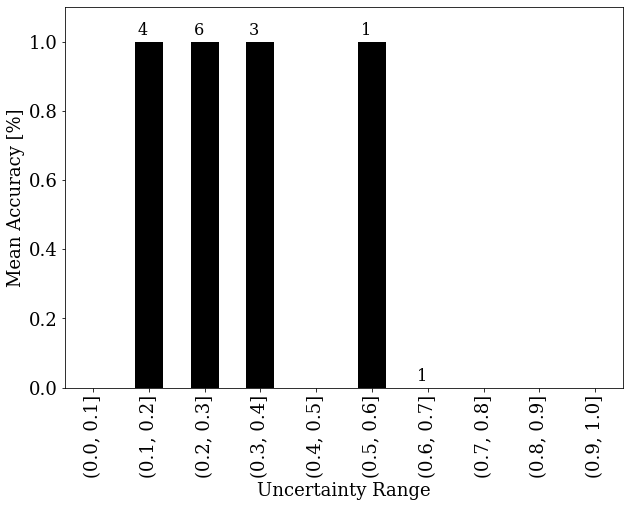

In [16]:
""" group by uncertainty """
# sourcery skip: avoid-global-variables
import numpy as np
df = pd.DataFrame(list(zip(preds, labels, probs, uncertainties, paths)), columns=[
                  'preds', 'labels', 'probs', 'uncertainties', 'paths'])
bins = np.linspace(0.0, 1.0, 11)
df['binned'] = pd.cut(df['uncertainties'], bins)
grouped_df = df.groupby('binned').apply(grouped_acc_df)
evidential.uncertainty_acc_hist(grouped_df)
